# Assignment 2

On your selected dataset for Capston Project, start doing EDA Analysis.
1. Import your data as a panda df
2. Look at Nulls, means, outliers, ...
3. Creat at least 5 new features(columns) based on other columns
4. Create a dictionary from two columns
5. Finally save your new df to a csv file or to a pkl file
6. Submitt your notebook (with results)
7. Have a clean, readable notebook with lots of markdown and comment cells matters. Remember, you are writing a notebook! Good Luck


- Helpful Links
    - https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
    - https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
    - https://towardsdatascience.com/a-better-eda-with-pandas-profiling-e842a00e1136
    - https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9
    - Search https://medium.com/ for more help 

# How to submit

- Create a Folder. Name it Number_Name_Assignment2
- Copy your csv and jupyter on that folder
- Zip the fodler
- upload it in Canvas

In [245]:
#1. Import your data as a panda df
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
df=pd.read_csv(r'C:\Users\Sravanthi\Desktop\Spring2021\ALY6140_Term-B\framingham.csv')
df

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0  

[4240 rows x 16 columns]

In [246]:
#2. Look at Nulls, means, outliers, ...
print(df.shape)
print(df.isnull().sum())
missing_values_count = df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (df.shape[0])
print('Maximum missing percentage is',max(missing_values_percent))


(4240, 16)
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Maximum missing percentage is 9.150943396226415


In [247]:
#Finding the statictcal information such as mean,std,min,1st,3rd quartiles and dropping null values
df.describe()
df.dropna(axis = 0, inplace = True)

In [248]:
#Function to find the outliers using IQR
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range
        
lowerbound,upperbound = outlier_treatment(df.cigsPerDay)
#Checking the outliers for cigsPerDay Column
df[(df.cigsPerDay < lowerbound) | (df.cigsPerDay > upperbound)]

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
327      1   56        1.0              1        60.0     0.0   
721      1   59        1.0              1        60.0     0.0   
1054     1   58        2.0              1        60.0     0.0   
1452     1   39        1.0              1        60.0     0.0   
1468     1   50        1.0              1        60.0     0.0   
1488     1   37        4.0              1        60.0     0.0   
1849     1   48        1.0              1        60.0     0.0   
2709     1   46        1.0              1        60.0     0.0   
3008     1   40        3.0              1        70.0     0.0   
3928     1   67        2.0              1        60.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
327                 0             0         0    246.0  125.0   79.0  29.64   
721                 0             1         0    298.0  153.5  105.0  25.05   
1054                0             1         0    250.0  150.0   97.0  32.00   
1452                0             0         0    215.0  112.0   65.0  23.60   
1468                0             1         0    340.0  134.0   95.0  30.46   
1488                0             0         0    254.0  122.5   82.5  23.87   
1849                0             0         0    252.0  104.0   73.5  23.03   
2709                0             0         0    285.0  121.0   82.0  27.62   
3008                0             1         0    210.0  132.0   86.0  31.57   
3928                0             1         0    261.0  170.0  100.0  22.71   

      heartRate  glucose  TenYearCHD  
327        70.0     85.0           0  
721        70.0     84.0           0  
1054       75.0     65.0           0  
1452       59.0     78.0           0  
1468       85.0     86.0           0  
1488       88.0     83.0           0  
1849       70.0     77.0           0  
2709       70.0     79.0           0  
3008       98.0     80.0           0  
3928       72.0     79.0           1

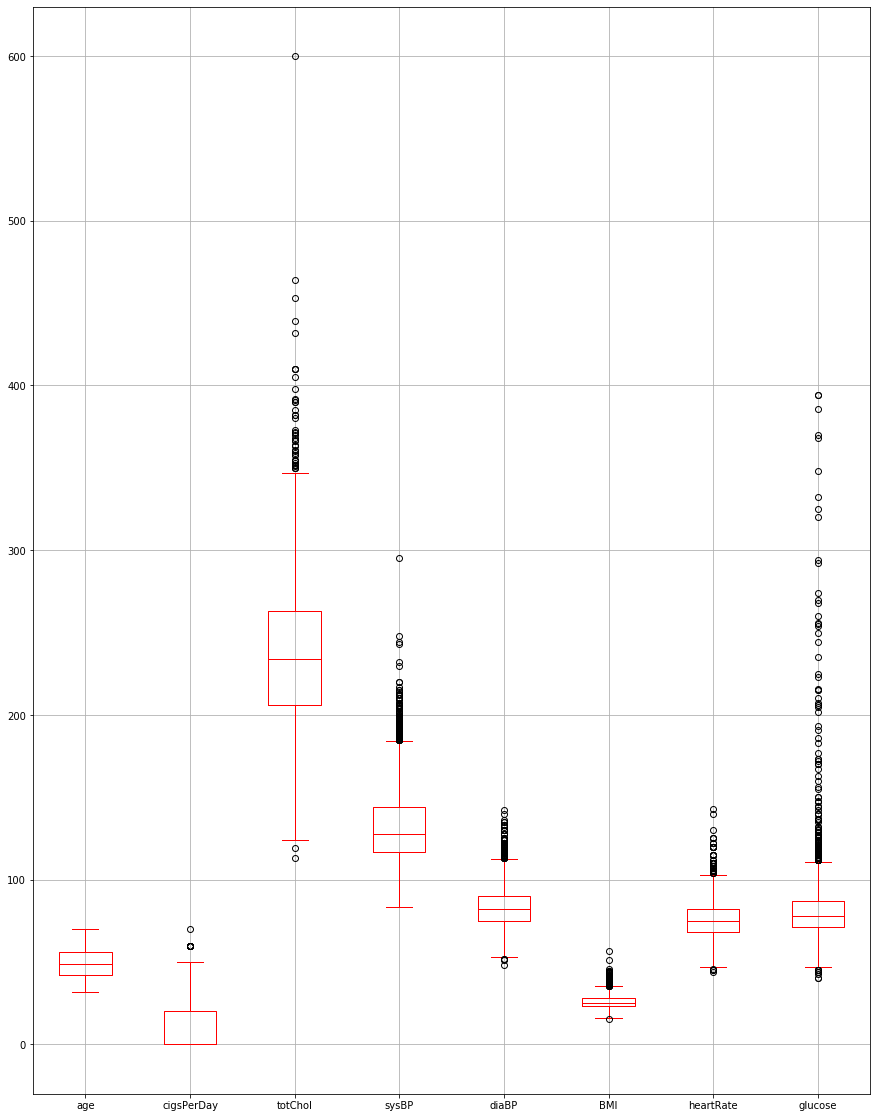

In [249]:
#Finding the outliers for numerical columns using Boxplots
outlier_detetcion_columns=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[outlier_detetcion_columns].boxplot(ax = ax,color = 'red')
plt.show()
        

In [250]:
#3. Creat at least 5 new features(columns) based on other columns

#1. A new column showing whether the person is senior citizen or not based on Age column
df['Seniorcitizen or not'] = ['Yes' if x > 58 else 'No'  for x in df['age']]
#2.  A new column showing the severity of smoking for each person bases on Cigsperday column
smoker = []
for row in df['cigsPerDay']:
        if row == 0.0 :    smoker.append('Not a smoker')
        elif row >0.0 and  row<15.0:   smoker.append('Moderate Smmoker')
        else :  smoker.append('HeavySmoker')
df['Rate of Smoking'] = smoker
#3. A new column Categerozing the Peoples Hypertension based on Systolic and Diastolic BP features
conditions = [
    (df['sysBP'] <120.00) & (df['diaBP'] < 80.00),
    (df['sysBP'] >160.00) & (df['diaBP'] > 100.00)]
choices = ['Normal Hyper Tension', 'Stage 2 Hyper Tension']
df['BP Range'] = np.select(conditions, choices, default='Pre/Stage1 Hypertension')
df.head()
#4 A new column Categerozing the Peoples Cholestrol level
conditions = [
    (df['age'] >20) & (df['totChol'] >200.00),
    (df['age'] >20) & (df['totChol'] < 200.00)]
choices = ['UnHealthy Cholestrol level', 'HealthyCholestrollevel']
df['CholestrolLevel'] = np.select(conditions, choices)
#5 A new column showing people whose hearrate is greater than 100
df['Hearrate Range']=['VeryhighHeartRate' if x >100 else 'NormalRate'  for x in df['heartRate']]
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  ...  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  ...   70.0  26.97       80.0     77.0   
1             0         0    250.0  ...   81.0  28.73       95.0     76.0   
2             0         0    245.0  ...   80.0  25.34       75.0     70.0   
3             1         0    225.0  ...   95.0  28.58       65.0    103.0   
4             0         0    285.0  ...   84.0  23.10       85.0     85.0   

   TenYearCHD  Seniorcitizen or not Rate of Smoking                 BP Range  \
0           0                    No    Not a smoker     Normal Hyper Tension   
1           0                    No    Not a smoker  Pre/Stage1 Hypertension   
2           0                    No     HeavySmoker  Pre/Stage1 Hypertension   
3           1                   Yes     HeavySmoker  Pre/Stage1 Hypertension   
4           0                    No     HeavySmoker  Pre/Stage1 Hypertension   

              CholestrolLevel Hearrate Range  
0      HealthyCholestrollevel     NormalRate  
1  UnHealthy Cholestrol level     NormalRate  
2  UnHealthy Cholestrol level     NormalRate  
3  UnHealthy Cholestrol level     NormalRate  
4  UnHealthy Cholestrol level     NormalRate  

[5 rows x 21 columns]

In [251]:
#4. CREATING A DICTIONARY{BMI:AGE}KEy=BMI, Index=Age

#Setting the index of the DataFrame to the key column using pandas.DataFrame.set_index(keys=None)
#with keys set to the name of the key column
df1=df[['age','BMI']]
trans_df = df1.set_index("BMI").T
print(trans_df.head())
#Transposing the resultant DataFram "list" to convert the transposed DataFrame to a dictionary.
dictionary = trans_df.to_dict("list")
print(dictionary)

BMI  26.97  28.73  25.34  28.58  23.10  30.30  33.11  21.68  26.36  23.61  \
age     39     46     48     61     46     43     63     45     52     43   

BMI  ...  26.05  25.62  43.67  24.96  23.14  25.97  19.71  21.47  25.60  20.91  
age  ...     58     43     50     58     68     50     51     52     40     39  

[1 rows x 3658 columns]


C:\Users\Sravanthi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  if __name__ == '__main__':


{26.97: [44], 28.73: [62], 25.34: [44], 28.58: [51], 23.1: [63], 30.3: [43], 33.11: [54], 21.68: [56], 26.36: [65], 23.61: [61], 22.91: [62], 27.64: [54], 26.31: [55], 31.31: [47], 21.35: [63], 22.37: [48], 23.38: [56], 23.24: [44], 26.88: [61], 21.59: [36], 34.17: [52], 25.11: [48], 21.96: [46], 24.18: [38], 26.09: [47], 32.8: [61], 30.36: [39], 28.15: [44], 27.57: [51], 20.77: [59], 24.71: [56], 38.53: [37], 40.11: [52], 28.93: [42], 27.78: [52], 26.87: [38], 23.28: [37], 26.21: [56], 21.51: [51], 20.68: [39], 30.47: [54], 23.59: [40], 22.15: [38], 27.1: [49], 23.47: [41], 19.66: [47], 28.27: [63], 20.35: [46], 17.61: [40], 25.65: [59], 22.29: [49], 25.45: [57], 23.58: [49], 24.25: [43], 19.64: [40], 24.88: [62], 26.84: [46], 28.6: [41], 29.64: [52], 23.01: [57], 20.13: [49], 23.51: [34], 28.61: [46], 33.8: [41], 22.16: [36], 34.55: [42], 24.04: [39], 45.8: [45], 30.58: [41], 26.52: [60], 32.51: [63], 22.49: [63], 26.03: [48], 29.35: [52], 22.73: [38], 23.89: [62], 38.46: [61], 28.56

In [252]:
#5.SAVING FILE TO CSV 
df.to_csv(r'C:\Users\Sravanthi\Desktop\Spring2021\ALY6140_Term-B\Assignmnet2DataSet.csv')